<a href="https://colab.research.google.com/github/muk465/CS6910-Fundamentals-of-Deeplearning/blob/main/Assignment2/PartA/Assignment2_A_train_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#current working directory
!pwd

/content


In [ ]:
#to get the dataset from url
!wget https://storage.googleapis.com/wandb_datasets/nature_12K.zip \
      --no-check-certificate
#unzip the data set
!unzip nature_12K.zip


Streaming output truncated to the last 5000 lines.
  inflating: inaturalist_12K/train/Arachnida/1ac25349af662e85f577a31f64beca41.jpg  
  inflating: inaturalist_12K/train/Arachnida/117ef7f1812725f359500448a258e713.jpg  
  inflating: inaturalist_12K/train/Arachnida/6409254954c3b46d88d64f0bf4c632fa.jpg  
  inflating: inaturalist_12K/train/Arachnida/aaed865750bd52944658a7dd23366948.jpg  
  inflating: inaturalist_12K/train/Arachnida/460cc09ef510d400a4d47a836ddd45e6.jpg  
  inflating: inaturalist_12K/train/Arachnida/55c48c3afef0b745e53951284cdb2db4.jpg  
  inflating: inaturalist_12K/train/Arachnida/bff3daa961ee96a37ebe12dc0bcce504.jpg  
  inflating: inaturalist_12K/train/Arachnida/9082d4f2107bccf1f14d71c8944be607.jpg  
  inflating: inaturalist_12K/train/Arachnida/93d0130423d42f7c6228150eb95a2a93.jpg  
  inflating: inaturalist_12K/train/Arachnida/051aba6d7bc324bad76bd438ed3cc276.jpg  
  inflating: inaturalist_12K/train/Arachnida/67595af09c015c7753d5d4935677590f.jpg  
  inflating: inaturalist_

In [ ]:
#mount gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os, sys
sys.path.append(
"/content/drive/MyDrive/CS6910/Assignment2"
)


In [ ]:
# Assign training and validation set directories
base_dir = '/content/inaturalist_12K'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'val')

In [ ]:
train_dir

'/content/inaturalist_12K/train'

In [ ]:
class_names=sorted(os.listdir(train_dir))
class_names=class_names[1:]

In [ ]:
#creatung individual dir for each species
Amphibia_dir=os.path.join(train_dir, 'Amphibia')
Animalia_dir=os.path.join(train_dir, 'Animalia')
Arachnida_dir=os.path.join(train_dir, 'Arachnida')
Aves_dir=os.path.join(train_dir, 'Aves')
Fungi_dir=os.path.join(train_dir, 'Fungi')
Insecta_dir=os.path.join(train_dir, 'Insecta')
Mammalia_dir=os.path.join(train_dir, 'Mammalia')
Mollusca_dir=os.path.join(train_dir, 'Mollusca')
Plantae_dir=os.path.join(train_dir, 'Plantae')
Reptilia_dir=os.path.join(train_dir, 'Reptilia')

In [ ]:
#printing num of training images in each dir
print('total training Amphibia images:', len(os.listdir(Amphibia_dir)))
print('total training Animalia images:', len(os.listdir(Animalia_dir)))
print('total training Arachnida images:', len(os.listdir(Arachnida_dir)))

print('total training Aves images:', len(os.listdir(Aves_dir)))
print('total training Fungi images:', len(os.listdir(Fungi_dir)))
print('total training Insecta images:', len(os.listdir(Insecta_dir)))

print('total training Mammalia images:', len(os.listdir(Mammalia_dir)))
print('total training Plantae images:', len(os.listdir(Plantae_dir)))
print('total training Arachnida images:', len(os.listdir(Arachnida_dir)))
print('total training Reptilia images:', len(os.listdir(Reptilia_dir)))


In [ ]:
#this code is to see randomly size of the images
from PIL import Image
from numpy import asarray
import numpy as np
index=np.random.randint(1000)
img_files=[]  
for root,dir,fname in os.walk(Amphibia_dir):
  for name in fname:
    img_file=os.path.join(root,name)
    img_files.append(img_file)
  
img = Image.open(img_files[index])
numpydata = asarray(img)
  
#  shape
print(numpydata.shape)

In [ ]:

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Input, InputLayer, Flatten, Conv2D, BatchNormalization, MaxPooling2D, Activation
from tensorflow.keras.models import Sequential,  Model


In [ ]:
!pip install wandb

     |████████████████████████████████| 1.7 MB 12.4 MB/s 
     |████████████████████████████████| 181 kB 45.8 MB/s 
     |████████████████████████████████| 144 kB 44.8 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=4a9c57f9f7d3b826207afe5a24c18e100336bab9efb60596f502831627cb6d30
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


In [ ]:
import wandb
from wandb.keras import WandbCallback
wandb.init()

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
def build_cnn(img_size, 
                 num_hidden_layers,
                 activation,
                 normalise,
                 filter_org,
                 filter_size,
                 num_base_filter,
                 dropout_fraction,
                 pool_size,
                 padding ,
                 dense_neurons,
                 num_classes,
                 optimizer,
              ):
  img_height=img_size[0]
  img_width=img_size[1]
  
  tf.keras.backend.clear_session()
  model = Sequential()
  
  #first ip cnn layer
  model.add(Conv2D(num_base_filter, filter_size, padding = padding,kernel_initializer = tf.keras.initializers.GlorotNormal(), input_shape = (img_height, img_width, 3)))
  
  
  #activation
  model.add(Activation(activation))
  
  #normalisation
  if normalise:
      model.add(BatchNormalization())
  #max pooling
  model.add(MaxPooling2D(pool_size=pool_size))  
  
  #dropout
  if dropout_fraction != None:
      model.add(tf.keras.layers.Dropout(dropout_fraction))
  
  for i in range(num_hidden_layers-1):
      exp2=2**(i+1)
      #same number of filters in all Convolutional layers
      if filter_org == "same":
          model.add(Conv2D(num_base_filter, filter_size,kernel_initializer = tf.keras.initializers.GlorotNormal(),padding = padding))
  
      #double number of filters in each Convolutional layers
      elif filter_org == "double":
          model.add(Conv2D(exp2*num_base_filter, filter_size,kernel_initializer = tf.keras.initializers.GlorotNormal(), padding = padding))
  
      #half the filter size in each successive convolutional layers
      else:
          model.add(Conv2D(num_base_filter//exp2, filter_size,kernel_initializer = tf.keras.initializers.GlorotNormal(), padding = padding))
  
      
      model.add(Activation(activation))
      if normalise:
        model.add(BatchNormalization())

      model.add(MaxPooling2D(pool_size=pool_size))
      
      if dropout_fraction != None:
          model.add(tf.keras.layers.Dropout(dropout_fraction))
  
  #Final densely connected layers
  model.add(Flatten())

  model.add(Dense(dense_neurons, activation = 'sigmoid'))
  model.add(Dense(num_classes, activation = 'softmax'))

  return model      

In [ ]:
import numpy as np
#train function
def train():
  num_hidden_layers = 5
  activation = 'relu'
  normalise = True
  filter_org = "same" 
  filter_size = (5,5)
  num_base_filter  = 32
  dropout_fraction = 0.1
  pool_size = (2,2)
  padding = 'valid'
  dense_neurons = 1024
  num_classes = 10
  optimizer = 'nadam'
  epochs = 10
  data_augmentation = False
  img_size = (500,500)
  batch_size = 32
  


  if data_augmentation:
      train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
              rescale=1./255,
              validation_split = 0.1,
              shear_range=0.2,
              zoom_range=0.2,
              rotation_range=15,  #rotate images 
              width_shift_range=0.1,  #translate horizontally
              height_shift_range=0.1,  # translate vertically
              horizontal_flip=True  # mirror the images
              )
  else:
      train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,validation_split = 0.1)

  test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)


  train_generator = train_datagen.flow_from_directory(
      train_dir,
      subset='training',
      target_size=(500,500),
      batch_size=batch_size,
      class_mode='categorical',
      shuffle = True,
      seed = 1)
      
  validation_generator = train_datagen.flow_from_directory(
          train_dir,
          target_size=(500,500),
          subset = 'validation',
          batch_size=batch_size,
          class_mode='categorical',
          shuffle = True,
          seed = 1)

  #creating the model
      
  model=build_cnn(img_size,
                num_hidden_layers,
                activation,
                normalise,
                filter_org,
                filter_size,
                num_base_filter,
                dropout_fraction,
                pool_size,
                padding ,
                dense_neurons,
                num_classes,
                optimizer)
  
  model.summary()


#compile the model with the the given optimizers and los is categorical crossentropy metric is accuracy
  model.compile(
  optimizer=optimizer,
  loss=tf.keras.losses.CategoricalCrossentropy(),
  metrics=['accuracy'],
  )

  history = model.fit(
                  train_generator,
                  steps_per_epoch = train_generator.samples // batch_size,
                  validation_data = validation_generator, 
                  validation_steps = validation_generator.samples //batch_size,
                  epochs = epochs, 
                  callbacks=[WandbCallback()]
                  )

  model.save('./save_train_model/')
  return model, history
      


In [ ]:
model,history=train()

Found 9000 images belonging to 10 classes.
Found 999 images belonging to 10 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 496, 496, 32)      2432      
                                                                 
 activation (Activation)     (None, 496, 496, 32)      0         
                                                                 
 batch_normalization (BatchN  (None, 496, 496, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 248, 248, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 248, 248, 32)      0         
                                     

In [ ]:
img_width=500
img_height=500

In [ ]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [ ]:
test_generator= test_datagen.flow_from_directory(
            test_dir,
            target_size=(img_width,img_height),
            batch_size=32,
            class_mode='categorical',
            shuffle = True, 
            seed=1)

Found 2000 images belonging to 10 classes.


In [ ]:
#tested the trained model
history_test = model.evaluate(test_generator)

63/63 [==============================] - 34s 535ms/step - loss: 2.1312 - accuracy: 0.3485


In [ ]:
from matplotlib import pyplot as plt

In [ ]:
#The generator will yield a tuple (images, labels), where images has shape (batch_size, image_size[0], image_size[1], num_channels)

(32, 500, 500, 3)
(500, 500, 3)


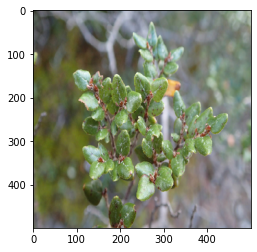

In [ ]:
batch=next(test_generator)  # returns the next batch of images and labels 
print(batch[0].shape)
img=batch[0][0]   # this is the first image  batch[0][1] would be the next image
print (img.shape)
plt.imshow(img)   # shows the first image

#You can set shuffle=True to get the images in random order

In [ ]:
#I want to create a number to class dictionary here 
class_dict=test_generator.class_indices
class_label_dict={}
for k,v in class_dict.items():
  class_label_dict[v]=k
class_label_dict

{0: 'Amphibia',
 1: 'Animalia',
 2: 'Arachnida',
 3: 'Aves',
 4: 'Fungi',
 5: 'Insecta',
 6: 'Mammalia',
 7: 'Mollusca',
 8: 'Plantae',
 9: 'Reptilia'}

In [ ]:
j=2
#test_generator index 0 selects a batch of 32 images ,the second index i.e if its 0 then it will be an image if its 1 then a label is selected,out of the 32 now I select one random image label whoch will be of shape (10,)

#so testgenerator[j][1] means batch 2 labels size of this is (32,10) out of this i randomly select one label  
random_img_from_batch=np.random.randint(32)
class_label_dict[np.argmax(test_generator[j][1][random_img_from_batch])]


'Amphibia'

In [ ]:
import numpy as np

In [ ]:
test_generator[0][1][2].shape


(10,)

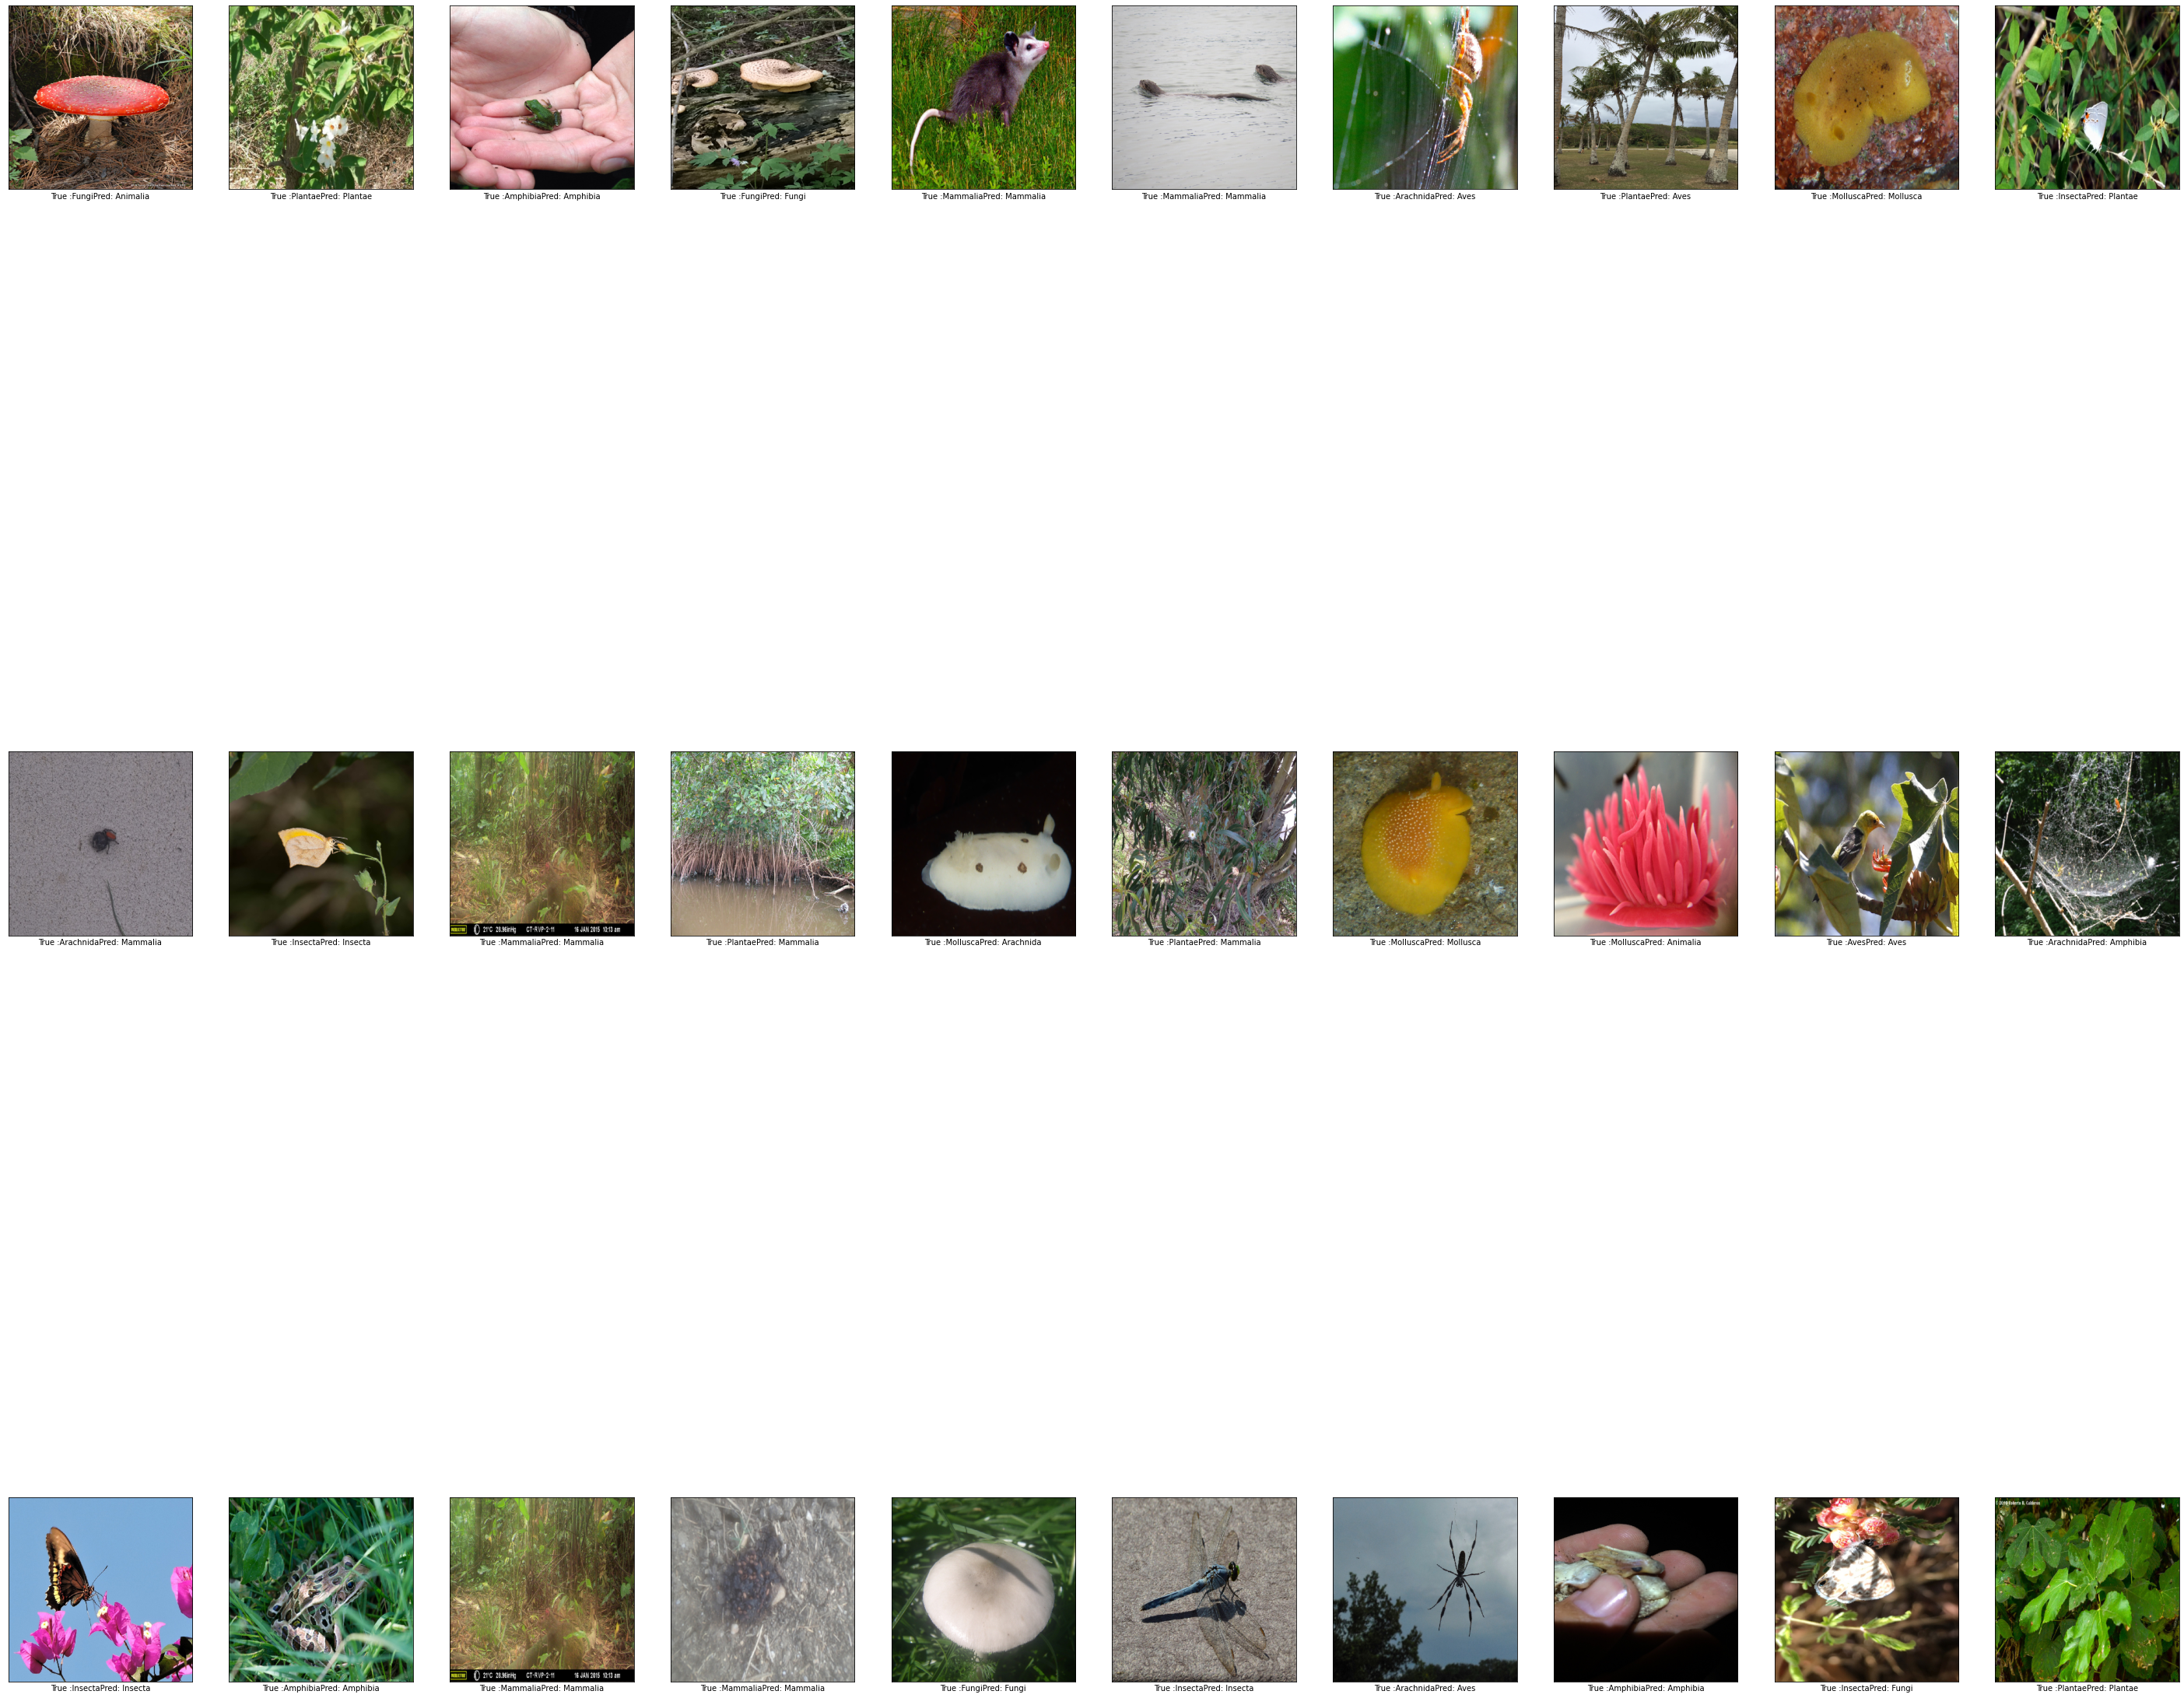

In [ ]:
rows=3
cols=10
s=1
plt.figure(figsize=(50, 50))
for i in range(rows):
  for j in range(cols):
    random_img_from_batch=np.random.randint(32)
    img=test_generator[j][0][random_img_from_batch]
    ax = plt.subplot(rows,cols, s) 
    ax.set_xticks([]) 
    ax.set_yticks([])
    plt.imshow(img)
    plt.xlabel("True :"+class_label_dict[np.argmax(test_generator[j][1][random_img_from_batch])] + "Pred: " + class_label_dict[np.argmax(model.predict(img.reshape(1,500,500,3)))]) 
    s+=1


In [ ]:
a=test_generator[2][0]
a.shape

(32, 500, 500, 3)